# Derrick's Data Analysis

Importing all the libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV File into a DataFrame

In [2]:
# Read the csv to a dataframe
filename = 'test.csv'
channels = pd.read_csv(filename)
channels

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
0,twitch,esl_csgo,ESL_CSGO,31239503,4292848,185971,27475,9375,21565,11202302.0,Counter-Strike: Global Offensive,https://static-cdn.jtvnw.net/jtv_user_pictures...,NaN,en,partner,Organization
1,twitch,xqc,xQc,71092938,3995899,135158,64106,3740,15028,10323441.0,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,CA,en,partner,Male
2,twitch,trymacs,Trymacs,64342766,3430674,79032,28590,7200,37057,8171570.0,FIFA 23,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
3,twitch,gaules,Gaules,181077473,3056759,85669,18341,10000,6659,4568511.0,Counter-Strike: Global Offensive,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
4,twitch,kaicenat,KaiCenat,641972806,3007049,102335,49230,3665,82896,6966873.0,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,twitch,thebausffs,Thebausffs,93869876,385678,23855,14740,1570,6068,917474.0,League of Legends,https://static-cdn.jtvnw.net/jtv_user_pictures...,SE,en,partner,Male
96,twitch,ponce,Ponce,50597026,384944,33459,10844,2130,1638,1404495.0,Maitre des Fleurs,https://static-cdn.jtvnw.net/jtv_user_pictures...,FR,fr,partner,Male
97,twitch,voodoosh,VooDooSh,87481167,380507,11587,7462,3060,577,418618.0,Heroes of Might and Magic III: The Restoration...,https://static-cdn.jtvnw.net/jtv_user_pictures...,RU,ru,partner,Male
98,twitch,grpzdc,GRPZDC,115141884,370002,16081,10399,2135,7139,NaN,Politics,https://static-cdn.jtvnw.net/jtv_user_pictures...,RU,ru,partner,Male


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Cleaning

Basic information

In [75]:
channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   platform              100 non-null    string 
 1   channel_name          100 non-null    string 
 2   channel_display_name  100 non-null    string 
 3   channel_id            100 non-null    int64  
 4   hours_watched         100 non-null    int64  
 5   peak_viewers          100 non-null    int64  
 6   average_viewers       100 non-null    int64  
 7   airtime_in_m          100 non-null    int64  
 8   followers_gain        100 non-null    int64  
 9   live_views            92 non-null     float64
 10  last_streamed_game    100 non-null    string 
 11  avatar_url            100 non-null    string 
 12  channel_country       92 non-null     string 
 13  stream_language       100 non-null    string 
 14  partnership_status    100 non-null    string 
 15  channel_type          10

Statistical Summary of Numeric Variables

In [76]:
channels.describe()

,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,9.200000e+01
mean,1.310473e+08,9.159098e+05,49792.310000,22942.730000,3318.150000,13280.750000,2.270053e+06
std,1.503364e+08,7.742373e+05,51001.966133,29444.386492,2228.781278,16206.205281,2.190096e+06
min,1.556483e+07,3.652430e+05,4789.000000,2412.000000,300.000000,-2011.000000,3.746000e+03
25%,3.803366e+07,4.706555e+05,20344.500000,9776.000000,2063.750000,2967.500000,1.014595e+06
50%,7.439214e+07,6.466060e+05,31879.500000,14780.000000,2740.000000,6515.000000,1.632198e+06
75%,1.454922e+08,9.834318e+05,58870.500000,25682.500000,3627.500000,18524.500000,2.759131e+06
max,6.419728e+08,4.292848e+06,361628.000000,261629.000000,10080.000000,82896.000000,1.120230e+07


Convert the datatype of 'platform', 'channel_name', 'channel_display_name', 'last_streamed_game', 'avatar_url', 'channel_country', 'stream_language', 'partnership_status', 'channel_type' from object to string

In [77]:
channels = channels.astype({'platform' : 'string', 'channel_name' : 'string', 'channel_display_name' : 'string', 'last_streamed_game' : 'string', 'avatar_url' : 'string', 'channel_country' : 'string', 'stream_language' : 'string', 'partnership_status' : 'string', 'channel_type' : 'string'})

Check the datatypes of the channels information again

In [78]:
channels.dtypes

platform                 string
channel_name             string
channel_display_name     string
channel_id                int64
hours_watched             int64
peak_viewers              int64
average_viewers           int64
airtime_in_m              int64
followers_gain            int64
live_views              float64
last_streamed_game       string
avatar_url               string
channel_country          string
stream_language          string
partnership_status       string
channel_type             string
dtype: object

Convert 'last_streamed_game' into lower_case

In [79]:
channels['last_streamed_game'].str.lower()

0                      counter-strike: global offensive
1                                         just chatting
2                                               fifa 23
3                      counter-strike: global offensive
4                                         just chatting
                            ...                        
95                                    league of legends
96                                    maitre des fleurs
97    heroes of might and magic iii: the restoration...
98                                             politics
99                                   escape from tarkov
Name: last_streamed_game, Length: 100, dtype: string

Get the number of missing data points per column

In [94]:
missing_values_count = channels.isnull().sum().sort_values(ascending=False)
print("Number of missing values: \n%s" % missing_values_count)
total_cells = np.product(channels.shape)
total_missing = missing_values_count.sum()

# Lambda method
# channels.apply(lambda x: sum(x.isnull()), axis=0)

Number of missing values: 
live_views              8
channel_country         8
platform                0
channel_name            0
channel_display_name    0
channel_id              0
hours_watched           0
peak_viewers            0
average_viewers         0
airtime_in_m            0
followers_gain          0
last_streamed_game      0
avatar_url              0
stream_language         0
partnership_status      0
channel_type            0
dtype: int64


Get the percentage of data that is missing

In [81]:
percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing cells: %d%%" % percent_missing)

Percentage of missing cells: 1%


Handling missing values for 'live_views'

In [82]:
# remove all columns with at least one missing value
channels2 = channels.dropna(subset=['live_views'])
channels2

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
0,twitch,esl_csgo,ESL_CSGO,31239503,4292848,185971,27475,9375,21565,11202302.0,Counter-Strike: Global Offensive,https://static-cdn.jtvnw.net/jtv_user_pictures...,<NA>,en,partner,Organization
1,twitch,xqc,xQc,71092938,3995899,135158,64106,3740,15028,10323441.0,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,CA,en,partner,Male
2,twitch,trymacs,Trymacs,64342766,3430674,79032,28590,7200,37057,8171570.0,FIFA 23,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
3,twitch,gaules,Gaules,181077473,3056759,85669,18341,10000,6659,4568511.0,Counter-Strike: Global Offensive,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
4,twitch,kaicenat,KaiCenat,641972806,3007049,102335,49230,3665,82896,6966873.0,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,twitch,gmhikaru,GMHikaru,103268673,386029,44820,12288,1885,6369,1775439.0,Chess,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
95,twitch,thebausffs,Thebausffs,93869876,385678,23855,14740,1570,6068,917474.0,League of Legends,https://static-cdn.jtvnw.net/jtv_user_pictures...,SE,en,partner,Male
96,twitch,ponce,Ponce,50597026,384944,33459,10844,2130,1638,1404495.0,Maitre des Fleurs,https://static-cdn.jtvnw.net/jtv_user_pictures...,FR,fr,partner,Male
97,twitch,voodoosh,VooDooSh,87481167,380507,11587,7462,3060,577,418618.0,Heroes of Might and Magic III: The Restoration...,https://static-cdn.jtvnw.net/jtv_user_pictures...,RU,ru,partner,Male


Handling missing values for 'channel_country'

In [95]:
channels2['channel_country'].fillna('-', inplace=True)
channels2['channel_country'].value_counts()

US    24
BR    11
DE     8
ES     8
FR     7
-      6
SE     4
KR     4
JP     3
CO     2
TR     2
CA     2
GB     1
NZ     1
MT     1
NL     1
TW     1
UA     1
IT     1
jp     1
MX     1
AR     1
RU     1
Name: channel_country, dtype: Int64

Check whether missing values are dropped or filled


In [84]:
missing_values_count = channels2.isnull().sum().sort_values(ascending=False)
print("Number of missing values: \n%s" % missing_values_count)
total_cells = np.product(channels.shape)
total_missing = missing_values_count.sum()

Number of missing values: 
platform                0
channel_name            0
channel_display_name    0
channel_id              0
hours_watched           0
peak_viewers            0
average_viewers         0
airtime_in_m            0
followers_gain          0
live_views              0
last_streamed_game      0
avatar_url              0
channel_country         0
stream_language         0
partnership_status      0
channel_type            0
dtype: int64


Convert 'live_views' data type into int64

In [85]:
channels2 = channels2.astype({'live_views':'int'})

Check whether numeric values of dataset are integers

In [86]:
channels2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   platform              92 non-null     string
 1   channel_name          92 non-null     string
 2   channel_display_name  92 non-null     string
 3   channel_id            92 non-null     int64 
 4   hours_watched         92 non-null     int64 
 5   peak_viewers          92 non-null     int64 
 6   average_viewers       92 non-null     int64 
 7   airtime_in_m          92 non-null     int64 
 8   followers_gain        92 non-null     int64 
 9   live_views            92 non-null     int64 
 10  last_streamed_game    92 non-null     string
 11  avatar_url            92 non-null     string
 12  channel_country       92 non-null     string
 13  stream_language       92 non-null     string
 14  partnership_status    92 non-null     string
 15  channel_type          92 non-null     stri

Check if there is any duplicated values

In [87]:
channels2.duplicated().sum()

0

## Data Exploration

Since our focus is on Content creators, we can filter based on the conditions 'Male' or 'Female' in column 'channel_type'

In [91]:
content_creators = channels2[(channels2.channel_type == 'Male') | (channels2.channel_type == 'Female')]
#content_creators = channels2[channels2.channel_type != 'Organization']
content_creators.tail(20)

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
72,twitch,bateson87,bateson87,28369163,479292,19532,9952,2890,23786,1955859,FIFA 23,https://static-cdn.jtvnw.net/jtv_user_pictures...,GB,en,partner,Male
73,twitch,yourragegaming,yourragegaming,36926489,477113,26224,18062,1585,8423,1656025,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
76,twitch,yoda,YoDa,47071880,447189,13129,8601,3120,1426,633351,League of Legends,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
77,twitch,grubby,Grubby,20992865,446867,11519,4148,6465,6201,723097,Dota 2,https://static-cdn.jtvnw.net/jtv_user_pictures...,NL,en,partner,Male
79,twitch,sypherpk,SypherPK,32140000,444877,20270,4476,5965,29345,1586520,Fortnite,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
80,twitch,elajjaz,Elajjaz,26921830,442334,10292,7716,3440,307,651849,Gothic II,https://static-cdn.jtvnw.net/jtv_user_pictures...,SE,en,partner,Male
81,twitch,gotaga,Gotaga,24147592,439490,43784,16430,1605,6972,1506171,Special Events,https://static-cdn.jtvnw.net/jtv_user_pictures...,FR,fr,partner,Male
82,twitch,baiano,Baiano,140772558,429643,75168,6866,3755,4632,111196,League of Legends,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
84,twitch,cellbit,Cellbit,28579002,415089,20538,9452,2635,4945,415493,The Crooked Man,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
85,twitch,thegrefg,TheGrefg,48878319,407468,48028,11811,2070,14865,3034043,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,ES,es,partner,Male


Basic information of Content Creator data set

In [92]:
content_creators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   platform              81 non-null     string
 1   channel_name          81 non-null     string
 2   channel_display_name  81 non-null     string
 3   channel_id            81 non-null     int64 
 4   hours_watched         81 non-null     int64 
 5   peak_viewers          81 non-null     int64 
 6   average_viewers       81 non-null     int64 
 7   airtime_in_m          81 non-null     int64 
 8   followers_gain        81 non-null     int64 
 9   live_views            81 non-null     int64 
 10  last_streamed_game    81 non-null     string
 11  avatar_url            81 non-null     string
 12  channel_country       81 non-null     string
 13  stream_language       81 non-null     string
 14  partnership_status    81 non-null     string
 15  channel_type          81 non-null     stri

Statistical Summary of Numeric Variables

In [90]:
content_creators.describe()

,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views
count,8.100000e+01,8.100000e+01,81.00000,81.000000,81.000000,81.000000,8.100000e+01
mean,1.306016e+08,9.348889e+05,41725.37037,19787.432099,3363.950617,13385.481481,2.277473e+06
std,1.497261e+08,7.522947e+05,34850.31011,16470.210608,1965.623425,16783.498419,2.060512e+06
min,1.556483e+07,3.652430e+05,4789.00000,2412.000000,1095.000000,-1180.000000,3.746000e+03
25%,3.874617e+07,4.839520e+05,20337.00000,9884.000000,2185.000000,2784.000000,1.105726e+06
50%,7.343740e+07,6.630120e+05,30584.00000,14650.000000,2880.000000,6659.000000,1.632941e+06
75%,1.450155e+08,1.046502e+06,52559.00000,23855.000000,3635.000000,17504.000000,2.912769e+06
max,6.419728e+08,3.995899e+06,222507.00000,98908.000000,10080.000000,82896.000000,1.096768e+07


## Graphical Univariate Analysis: 


### Histogram

Two important things we can learn from a histogram
1.   Distribution of the data - whether the data is normally distributed or if it's skewed (to the left or right)
2.   To identify outliers - Extremely low or high values that do not fall near any other data points.

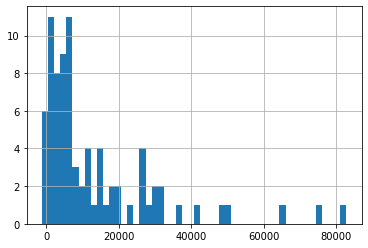

In [123]:
content_creators['followers_gain'].hist(bins=50)

In [ ]:
content_creators['hours_watched'].hist(bins=50)

In [ ]:
content_creators['peak_viewers'].hist(bins=50)

In [ ]:
content_creators['average_viewers'].hist(bins=50)

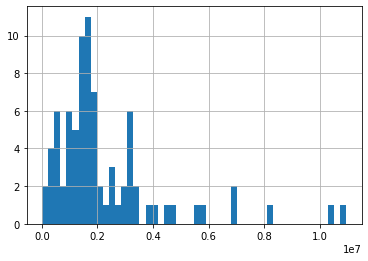

In [103]:
content_creators['live_views'].hist(bins=50)

Here we can see that majority of the content creators have live views that falls within the 1,000,000 to 2,000,000 range and that there are outliers that has above 10,000,000 live views.

### Box Plots
Visual representation of the statistical summary of the content_creator data set

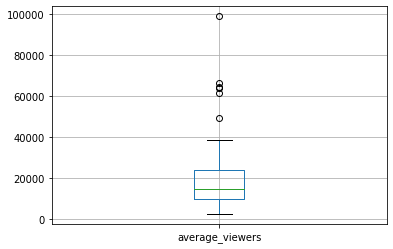

In [115]:
content_creators.boxplot(column='average_viewers')

### Correlation Plot
To find the correlation among the variables, this will give you a fair idea of the correlation strength between different variables

In [120]:
content_creators.corr()

,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views
channel_id,1.000000,0.358705,0.528916,0.502436,-0.141426,0.536693,0.300346
hours_watched,0.358705,1.000000,0.781990,0.745990,0.177891,0.543573,0.803335
peak_viewers,0.528916,0.781990,1.000000,0.929139,-0.190054,0.682733,0.801849
average_viewers,0.502436,0.745990,0.929139,1.000000,-0.327383,0.725848,0.751418
airtime_in_m,-0.141426,0.177891,-0.190054,-0.327383,1.000000,-0.196280,-0.038713
followers_gain,0.536693,0.543573,0.682733,0.725848,-0.196280,1.000000,0.613940
live_views,0.300346,0.803335,0.801849,0.751418,-0.038713,0.613940,1.000000


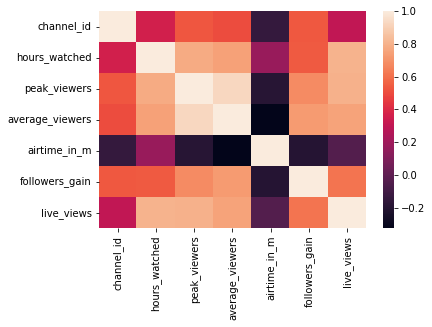

In [121]:
sns.heatmap(content_creators.corr())

### Creating new DataFrames for each category and sorting them in descending order

Sort content creators by 'followers_gained'

In [58]:
followers_gained_df = content_creators.sort_values(['followers_gain'], ascending = False)
followers_gained_df

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
4,twitch,kaicenat,KaiCenat,641972806,3007049,102335,49230,3665,82896,6966873,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
8,twitch,elspreen,ElSpreen,157658336,1859413,140125,64489,1730,74494,6850141,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,AR,es,partner,Male
15,twitch,elmariana,ElMariana,496795673,1277938,58745,38629,1985,65795,3344404,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,MX,es,partner,Male
6,twitch,auronplay,auronplay,459331509,2926012,222507,98908,1775,50763,10967678,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,ES,es,partner,Male
10,twitch,paulinholokobr,PaulinhoLOKObr,531177917,1669927,120294,66355,1510,48545,3256259,Grand Theft Auto V,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,twitch,quin69,Quin69,56649026,483952,14224,9234,3145,414,727296,Path of Exile,https://static-cdn.jtvnw.net/jtv_user_pictures...,NZ,en,partner,Male
60,twitch,shuteye_orange,蝦愛橘子,25202416,560469,6411,3337,10080,409,485800,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,TW,zh,partner,Male
80,twitch,elajjaz,Elajjaz,26921830,442334,10292,7716,3440,307,651849,Gothic II,https://static-cdn.jtvnw.net/jtv_user_pictures...,SE,en,partner,Male
93,twitch,zerator,ZeratoR,41719107,389577,17448,8642,2705,190,1023002,World of Warcraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,FR,fr,partner,Male


Sort content creators by 'hours_watched'

In [59]:
hours_watched_df = content_creators.sort_values(['hours_watched'], ascending = False)
hours_watched_df

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
1,twitch,xqc,xQc,71092938,3995899,135158,64106,3740,15028,10323441,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,CA,en,partner,Male
2,twitch,trymacs,Trymacs,64342766,3430674,79032,28590,7200,37057,8171570,FIFA 23,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
3,twitch,gaules,Gaules,181077473,3056759,85669,18341,10000,6659,4568511,Counter-Strike: Global Offensive,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
4,twitch,kaicenat,KaiCenat,641972806,3007049,102335,49230,3665,82896,6966873,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
5,twitch,eliasn97,eliasn97,238813810,2945764,100103,61585,2870,31435,3746,FIFA 23,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,twitch,gmhikaru,GMHikaru,103268673,386029,44820,12288,1885,6369,1775439,Chess,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
95,twitch,thebausffs,Thebausffs,93869876,385678,23855,14740,1570,6068,917474,League of Legends,https://static-cdn.jtvnw.net/jtv_user_pictures...,SE,en,partner,Male
96,twitch,ponce,Ponce,50597026,384944,33459,10844,2130,1638,1404495,Maitre des Fleurs,https://static-cdn.jtvnw.net/jtv_user_pictures...,FR,fr,partner,Male
97,twitch,voodoosh,VooDooSh,87481167,380507,11587,7462,3060,577,418618,Heroes of Might and Magic III: The Restoration...,https://static-cdn.jtvnw.net/jtv_user_pictures...,RU,ru,partner,Male


Sort content creators by 'peak_viewers'

In [60]:
peak_viewers_df = content_creators.sort_values(['peak_viewers'], ascending = False)
peak_viewers_df

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
6,twitch,auronplay,auronplay,459331509,2926012,222507,98908,1775,50763,10967678,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,ES,es,partner,Male
8,twitch,elspreen,ElSpreen,157658336,1859413,140125,64489,1730,74494,6850141,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,AR,es,partner,Male
1,twitch,xqc,xQc,71092938,3995899,135158,64106,3740,15028,10323441,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,CA,en,partner,Male
10,twitch,paulinholokobr,PaulinhoLOKObr,531177917,1669927,120294,66355,1510,48545,3256259,Grand Theft Auto V,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
4,twitch,kaicenat,KaiCenat,641972806,3007049,102335,49230,3665,82896,6966873,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,twitch,elajjaz,Elajjaz,26921830,442334,10292,7716,3440,307,651849,Gothic II,https://static-cdn.jtvnw.net/jtv_user_pictures...,SE,en,partner,Male
99,twitch,lvndmark,LVNDMARK,427632467,365243,9614,6271,3495,1859,651993,Escape from Tarkov,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
61,twitch,ungespielt,ungespielt,36983084,559931,8101,4319,7780,6068,496645,World of Warcraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
60,twitch,shuteye_orange,蝦愛橘子,25202416,560469,6411,3337,10080,409,485800,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,TW,zh,partner,Male


Sort content creators by 'average_viewers'

In [61]:
average_viewers_df = content_creators.sort_values(['average_viewers'], ascending = False)
average_viewers_df

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
6,twitch,auronplay,auronplay,459331509,2926012,222507,98908,1775,50763,10967678,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,ES,es,partner,Male
10,twitch,paulinholokobr,PaulinhoLOKObr,531177917,1669927,120294,66355,1510,48545,3256259,Grand Theft Auto V,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
8,twitch,elspreen,ElSpreen,157658336,1859413,140125,64489,1730,74494,6850141,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,AR,es,partner,Male
1,twitch,xqc,xQc,71092938,3995899,135158,64106,3740,15028,10323441,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,CA,en,partner,Male
5,twitch,eliasn97,eliasn97,238813810,2945764,100103,61585,2870,31435,3746,FIFA 23,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,twitch,sypherpk,SypherPK,32140000,444877,20270,4476,5965,29345,1586520,Fortnite,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
61,twitch,ungespielt,ungespielt,36983084,559931,8101,4319,7780,6068,496645,World of Warcraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
77,twitch,grubby,Grubby,20992865,446867,11519,4148,6465,6201,723097,Dota 2,https://static-cdn.jtvnw.net/jtv_user_pictures...,NL,en,partner,Male
60,twitch,shuteye_orange,蝦愛橘子,25202416,560469,6411,3337,10080,409,485800,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,TW,zh,partner,Male


Sort content creators by 'live_views'

In [62]:
live_views_df = content_creators.sort_values(['live_views'], ascending = False)
live_views_df

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
6,twitch,auronplay,auronplay,459331509,2926012,222507,98908,1775,50763,10967678,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,ES,es,partner,Male
1,twitch,xqc,xQc,71092938,3995899,135158,64106,3740,15028,10323441,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,CA,en,partner,Male
2,twitch,trymacs,Trymacs,64342766,3430674,79032,28590,7200,37057,8171570,FIFA 23,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
4,twitch,kaicenat,KaiCenat,641972806,3007049,102335,49230,3665,82896,6966873,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
8,twitch,elspreen,ElSpreen,157658336,1859413,140125,64489,1730,74494,6850141,Minecraft,https://static-cdn.jtvnw.net/jtv_user_pictures...,AR,es,partner,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,twitch,voodoosh,VooDooSh,87481167,380507,11587,7462,3060,577,418618,Heroes of Might and Magic III: The Restoration...,https://static-cdn.jtvnw.net/jtv_user_pictures...,RU,ru,partner,Male
84,twitch,cellbit,Cellbit,28579002,415089,20538,9452,2635,4945,415493,The Crooked Man,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
57,twitch,cohhcarnage,CohhCarnage,26610234,586426,18851,9884,3560,614,413331,Grounded,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
82,twitch,baiano,Baiano,140772558,429643,75168,6866,3755,4632,111196,League of Legends,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male


### Creating new DataFrame for Most and Least of each category

20 Content Creators with the **most Followers Gained**

In [ ]:
# Content creators with most followers gained
mostfollowers_gained = followers_gained_df.iloc[0:20]
mostfollowers_gained

20 Content Creators with the **least Followers Gained**

In [ ]:
# Content creators with least followers gained
leastfollowers_gained = followers_gained_df.iloc[-20:]
leastfollowers_gained

20 Content Creators with the **most Hours Watched**

In [ ]:
# Content creators with most hours watched
mosthours_watched = hours_watched_df.iloc[0:20]
mosthours_watched

20 Content Creators with the **least Hours Watched**

In [ ]:
# Content creators with least hours watched
leasthours_watched = hours_watched_df.iloc[-20:]
leasthours_watched

20 Content Creators with the **most Peak Viewers**

In [ ]:
# Content creators with most peak viewers
mostpeaked_viewers = peak_viewers_df.iloc[0:20]
mostpeaked_viewers

20 Content Creators with the **least Peak Viewers**

In [ ]:
# Content creators with least peak viewers
leastpeaked_viewers = peak_viewers_df.iloc[-20:]
leastpeaked_viewers

20 Content Creators with the **most Average Viewers**

In [ ]:
# Content creators with most average viewers
mostaveraged_viewers = average_viewers_df.iloc[0:20]
mostaveraged_viewers

20 Content Creators with the **least Average Viewers**

In [ ]:
# Content creators with least average viewers
leastaveraged_viewers = average_viewers_df.iloc[-20:]
leastaveraged_viewers

20 Content Creators with the **most Live Views**

In [ ]:
# Content creators with most live views
mostlive_views = live_views_df.iloc[0:20]
mostlive_views

20 Content Creators with the **least Live Views**

In [ ]:
# Content creators with least live views
leastlive_views = live_views_df.iloc[-20:]
leastlive_views

## Data Visualisation



# Let users export data from dataframe

In [ ]:
# mostfollowers_gained.to_csv('mostfollowers_gained.csv')

# leastfollowers_gained.to_csv('leastfollowers_gained.csv')

# mosthours_watched.to_csv('mosthours_watched.csv')

# leasthours_watched.to_csv('leasthours_watched.csv')

# mostpeaked_viewers.to_csv('mostpeaked_viewers.csv')

# leastpeaked_viewers.to_csv('leastpeaked_viewers.csv')

# mostaveraged_viewers.to_csv('mostaveraged_viewers.csv')

# leastaveraged_viewers.to_csv('leastaveraged_viewers.csv')

# mostlive_views.to_csv('mostlive_views.csv')

# leastlive_views.to_csv('leastlive_views.csv')